In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the training dataset
df_train = pd.read_csv("p1_train.csv", names=["Feature1", "Feature2", "Target"])

print(df_train.head())
print(df_train.info())
print(df_train.describe())



           Feature1      Feature2        Target
count  10000.000000  10000.000000  10000.000000
mean      -0.111211      0.099982      3.101570
std       11.550481     11.478836     25.851530
min      -19.996699    -19.998481    -59.284604
25%      -10.243879     -9.766645    -16.589593
50%       -0.054870      0.222515      3.057164
75%        9.759060     10.003534     22.960145
max       19.997594     19.990429     65.001858


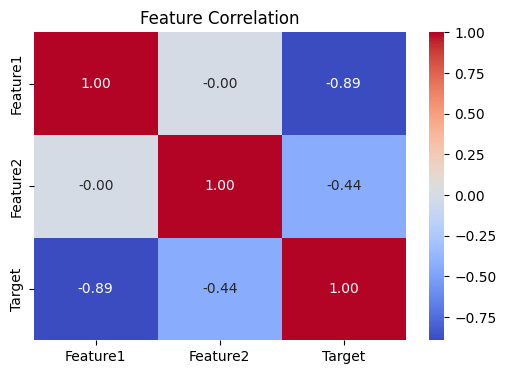

          Feature1  Feature2    Target
Feature1  1.000000 -0.002424 -0.892371
Feature2 -0.002424  1.000000 -0.440670
Target   -0.892371 -0.440670  1.000000


In [13]:
#correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(df_train.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation")
plt.show()
print(df_train.corr())

In [16]:
#Train Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Split data into X (features) and y (target)
X = df_train[['Feature1', 'Feature2']]
y = df_train['Target']

#Train-test split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

#Train Linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

#Prediction on validation set
y_pred = model.predict(X_val)

#Evaluate performance
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 5.0833
Mean Absolute Error (MAE): 1.7843


In [17]:
#Load the test data
df_test = pd.read_csv("p1_test.csv", names=["Feature1", "Feature2", "Target"])

#split data into X (features) and y (target)
X_test = df_test[["Feature1", "Feature2"]]
y_test = df_test["Target"]

#predict on test data
y_test_pred = model.predict(X_test)

#Evaluate performance
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

#output
print(f'Mean Squared Error (Test MSE): {mse_test:.4f}')
print(f'Mean Absolute Error (Test MAE): {mae_test:.4f}')

Mean Squared Error (Test MSE): 5.0479
Mean Absolute Error (Test MAE): 1.7994


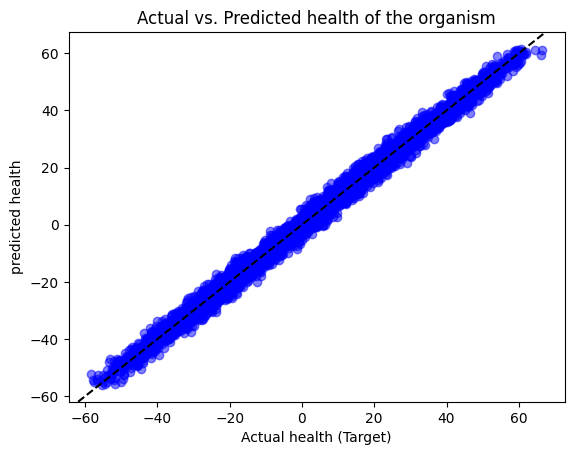

In [ ]:
#Visualize to understand
plt.scatter(y_test, y_test_pred, color="blue", alpha=0.5)
plt.xlabel("Actual health (Target)")
plt.ylabel("predicted health")
plt.title("Actual vs. Predicted health of the organism")
plt.axline((0,0), slope=1, color='black', linestyle='--')
plt.show()

In [22]:
df_results = pd.DataFrame({
    "Actual health": y_test.values,
    "Predicted health": y_test_pred
})

print(df_results.head(10))

   Actual health  Predicted health
0     -37.567929        -40.483582
1      11.475211         12.936312
2      11.468441         13.590490
3     -15.159309        -13.866352
4      17.392223         15.678772
5     -18.291343        -17.528323
6     -12.623356        -10.971274
7       0.985754          4.055674
8     -13.006255        -10.670065
9      17.530299         20.323406
